In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import random
import heapq
import timeit
from memory_profiler import profile,memory_usage
import numpy as np

In [2]:
# Load the New York City graph from OSM
place_name = "New York City, New York, USA"
G = ox.graph_from_place(place_name, network_type="drive")

# Choose random start and end nodes
start_node = list(G.nodes())[0]
end_node = list(G.nodes())[45593]
#45593
def euclidian_distance(node,goal):
    x1, y1 = G.nodes[node]['x'], G.nodes[node]['y']
    x2, y2 = G.nodes[goal]['x'], G.nodes[goal]['y']
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
def heuristic(node, goal,w):
#     x1, y1 = G.nodes[node]['x'], G.nodes[node]['y']
#     x2, y2 = G.nodes[goal]['x'], G.nodes[goal]['y']
#     std_dist =  ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
#     risk=random.uniform(0.1, 0.18)*w

    std_dist=euclidian_distance(node,goal)
    risk=euclidian_distance(end_node, goal)
#     risk=random.uniform(0.1, 0.18)*w
    return std_dist + risk*w

In [3]:
#Optimal path finder ()
@profile
def optimal_path_search(graph, start, goal, heuristic):
    return nx.shortest_path(G, source=start, target=goal, weight='length')
# Implement BEST FIRST SEARCH algorithm
@profile
def best_first_search(graph, start, goal, heuristic):
    frontier = [(start, 0)]
    visited = set()
    paths = {start: [start]}  # Keep track of the path to each node

    while frontier:
        current_node, _ = frontier.pop(0)

        if current_node == goal:
            return paths[current_node]

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                cost = heuristic(neighbor, goal,1)
                frontier.append((neighbor, cost))
                paths[neighbor] = paths[current_node] + [neighbor]

        frontier = sorted(frontier, key=lambda x: x[1])
        
        
# Implement A* algorithm
@profile
def a_star_search(graph, start, goal, heuristic,w):
    frontier = [(0, start)]  # Priority queue with tuple (priority, node)
    visited = set()
    g_values = {start: 0}  # Cost to reach each node
    paths = {start: [start]}  # Keep track of the path to each node

    while frontier:
        _, current_node = heapq.heappop(frontier)

        if current_node == goal:
            return paths[current_node]

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                cost_to_neighbor = g_values[current_node] + graph[current_node][neighbor].get('weight', 1)
                if neighbor not in g_values or cost_to_neighbor < g_values[neighbor]:
                    g_values[neighbor] = cost_to_neighbor
                    priority = cost_to_neighbor + heuristic(neighbor, goal,1)
                    heapq.heappush(frontier, (priority, neighbor))
                    paths[neighbor] = paths[current_node] + [neighbor]

    return None  # If no path is found

In [4]:
# Run the algorithm
elapsed_times = []
start_time = timeit.default_timer()
optimal_memory, optimal_path = memory_usage((optimal_path_search, (G, start_node, end_node, heuristic)), retval=True)
elapsed_times.append(timeit.default_timer() - start_time)
optimal_times = np.linspace(0.1, 0.1 * len(optimal_memory), len(optimal_memory))
print(1)

start_time = timeit.default_timer()
bfs_memory, bfs_path = memory_usage((best_first_search, (G, start_node, end_node, heuristic)), retval=True)
elapsed_times.append(timeit.default_timer() - start_time)
bfs_times = np.linspace(0.1, 0.1 * len(bfs_memory), len(bfs_memory))
print(2)


start_time = timeit.default_timer()
w=1
a_star_memory,a_star_path = memory_usage((a_star_search, (G, start_node, end_node, heuristic,w)),retval=True,)
elapsed_times.append(timeit.default_timer() - start_time)
a_star_times = np.linspace(0.1, 0.1 * len(a_star_memory), len(a_star_memory))
print(3)

start_time = timeit.default_timer()
w=10
weighted_a_star_memory,weighted_a_star_path = memory_usage((a_star_search, (G, start_node, end_node, heuristic,w)),retval=True,)
elapsed_times.append(timeit.default_timer() - start_time)
weighted_a_star_times = np.linspace(0.1, 0.1 * len(weighted_a_star_memory), len(weighted_a_star_memory))
print(4)

# Print time measurements
print("Time taken by Optimal Path (NetworkX): {:.6f} seconds".format(elapsed_times[0]))
print("Time taken by Best First Search: {:.6f} seconds".format(elapsed_times[1]))
print("Time taken by A* Search: {:.6f} seconds".format(elapsed_times[2]))
print("Time taken by Weighted A* Search: {:.6f} seconds".format(elapsed_times[3]))

ERROR: Could not find file /var/folders/_k/6ljj9ghs3jv73tjlmdc0yfqr0000gn/T/ipykernel_79388/937441646.py
1
ERROR: Could not find file /var/folders/_k/6ljj9ghs3jv73tjlmdc0yfqr0000gn/T/ipykernel_79388/937441646.py
2
ERROR: Could not find file /var/folders/_k/6ljj9ghs3jv73tjlmdc0yfqr0000gn/T/ipykernel_79388/937441646.py
3
ERROR: Could not find file /var/folders/_k/6ljj9ghs3jv73tjlmdc0yfqr0000gn/T/ipykernel_79388/937441646.py
4
Time taken by Optimal Path (NetworkX): 0.574987 seconds
Time taken by Best First Search: 5.362100 seconds
Time taken by A* Search: 1.432871 seconds
Time taken by Weighted A* Search: 1.421158 seconds


# Time Comparison

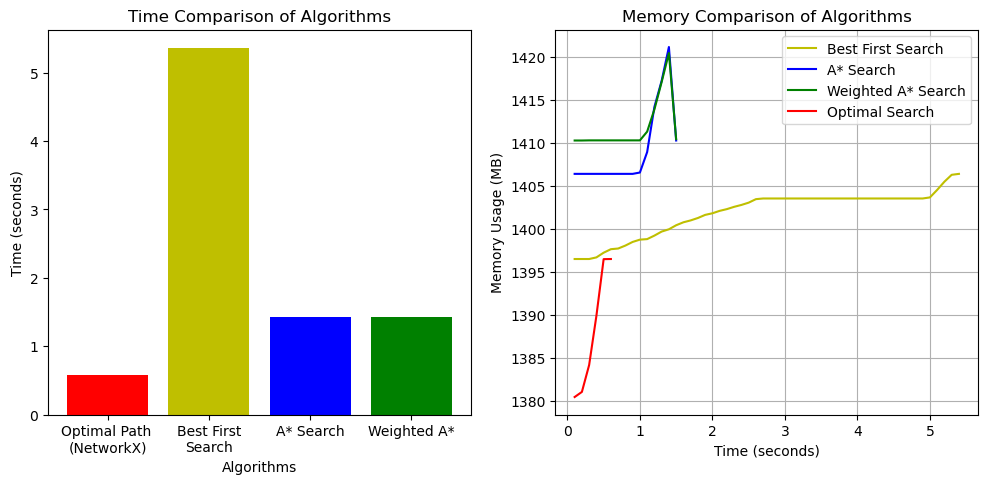

In [5]:
# Plot time comparison
plt.figure(figsize=(12,5))
algorithms = ['Optimal Path \n(NetworkX)', 'Best First\nSearch' ,'A* Search', 'Weighted A*']
plt.subplot(1,2,1)
plt.bar(algorithms, elapsed_times, color=['r', 'y', 'b','g'])
plt.xlabel('Algorithms')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison of Algorithms')


# Plot memory comparison graph
plt.subplot(1,2,2)
plt.plot(bfs_times,bfs_memory, label='Best First Search', color='y')
plt.plot(a_star_times,a_star_memory, label='A* Search', color='b')
plt.plot(weighted_a_star_times,weighted_a_star_memory, label='Weighted A* Search', color='g')
plt.plot(optimal_times,optimal_memory, label='Optimal Search', color='r')
plt.xlabel('Time (seconds)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Comparison of Algorithms')
plt.legend()
plt.grid()
plt.show()

# Search Space

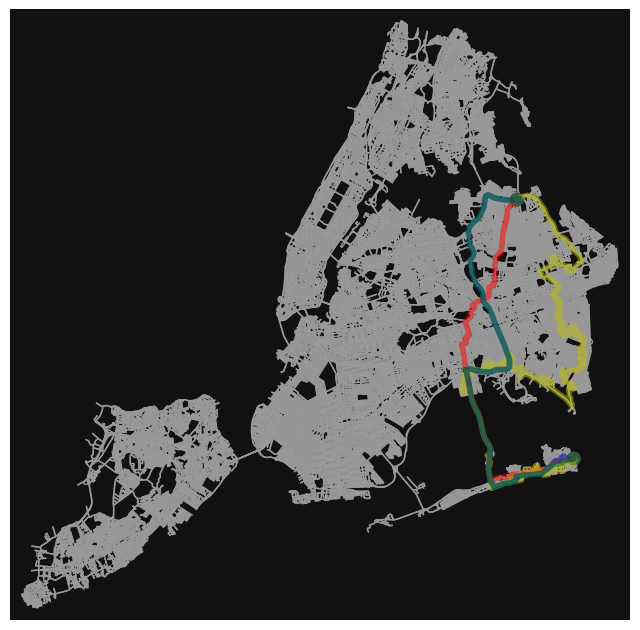

In [6]:
routes = [optimal_path, bfs_path,a_star_path,weighted_a_star_path]
rc = ['r', 'y','b','g']
# Visualize the graph
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=8, node_size=0)

plt.show()

ERROR: Could not find file /var/folders/_k/6ljj9ghs3jv73tjlmdc0yfqr0000gn/T/ipykernel_30253/937441646.py
ERROR: Could not find file /var/folders/_k/6ljj9ghs3jv73tjlmdc0yfqr0000gn/T/ipykernel_30253/937441646.py


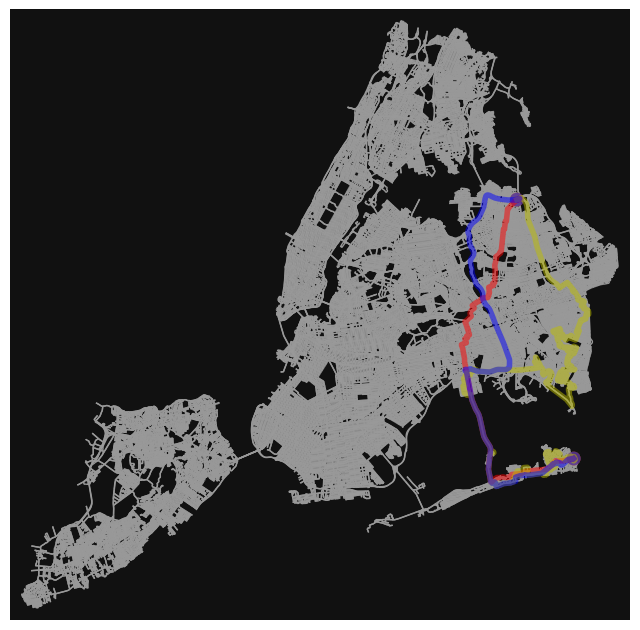

In [16]:
# Run the algorithm
bfs_path = best_first_search(G, start_node, end_node, heuristic)
optimal_path = nx.shortest_path(G, source=start_node, target=end_node, weight='length')
a_star_path = a_star_search(G, start_node, end_node, heuristic,1)

routes = [optimal_path, bfs_path,a_star_path]
rc = ['r', 'y','b']
# Visualize the graph
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=3, node_size=0)
plt.show()